### Author: Sudhir Panwar
### Task 3: Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore' 
### The Sparks Foundation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Univariant analysis

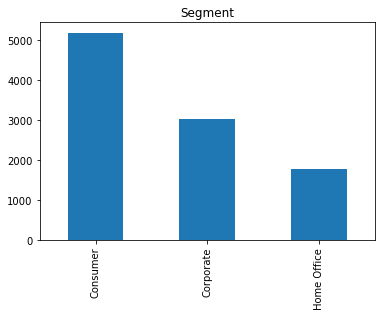

In [7]:
df['Segment'].value_counts().plot.bar(title = 'Segment')

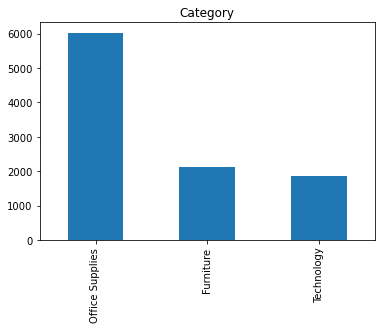

In [8]:
df['Category'].value_counts().plot.bar(title = 'Category')

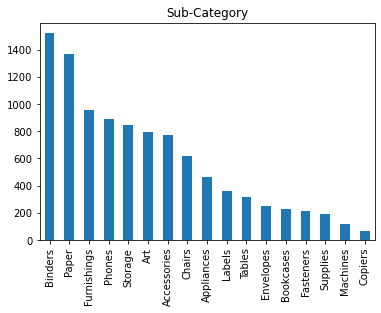

In [9]:
df['Sub-Category'].value_counts().plot.bar(title = 'Sub-Category')

### Bivariant Analysis

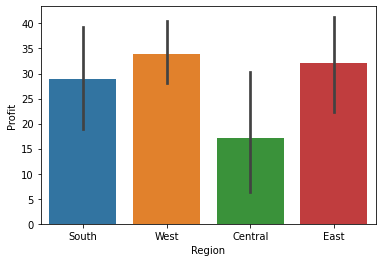

In [11]:
sns.barplot(x = 'Region', y = 'Profit', data = df, estimator = np.mean)

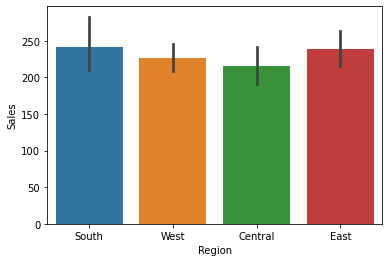

In [10]:
sns.barplot(x = 'Region', y = 'Sales', data = df, estimator = np.mean)

#### Multivariant Analysis

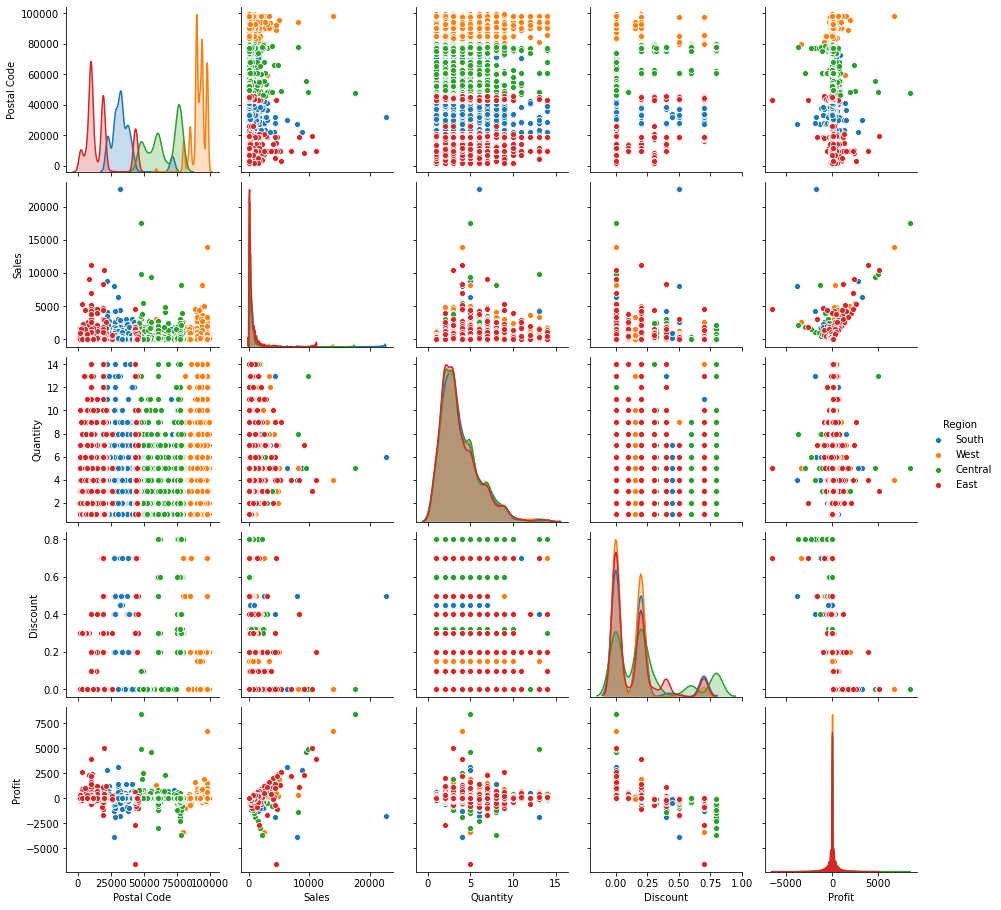

In [12]:
sns.pairplot(df, hue = 'Region')

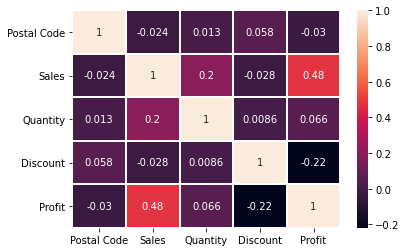

In [13]:
sns.heatmap(df.corr(), annot = True, lw = 1)

#### From the pairplot and heatmap, we can infer that profit is depending mostly on Sales and Discount. As Sales are increasing and Discount is decreasing, Profit is increasing.

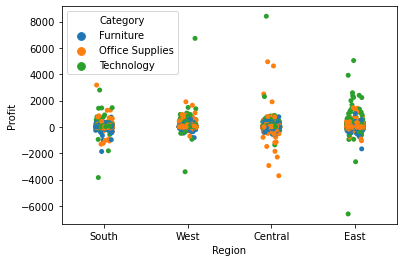

In [14]:
sns.stripplot(x = 'Region', y = 'Profit', data = df, jitter = True, hue = 'Category')

### Central region

### Obsevations:
##### 1. Texas and Illinois states are keeping heavy discont leads them to heavy loss in profit
##### 2. Discount and Quantities sold in Office Supplies are way higher than other Categories
#### 3. Sales of items in all category is same
#### 4. There is loss in Furniture category 
#### 5. As discount is increased beyond 30%, profit is decreased significantly in all categories

In [15]:
df_central = df[df['Region'] == 'Central']

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'Region', y = 'Profit', data = df_central, estimator = np.sum, hue = 'Category')

In [17]:
df_central.groupby(['Segment','Category','Sub-Category'])[['Profit']].sum()     

Profit
Segment     Category        Sub-Category            
Consumer    Furniture       Bookcases     -1497.1260
                            Chairs         2920.9013
                            Furnishings   -1454.0524
                            Tables        -3964.1571
            Office Supplies Appliances    -3775.6065
                            Art             605.5615
                            Binders        1832.3210
                            Envelopes       912.6616
                            Fasteners       128.1477
                            Labels          334.2023
                            Paper          2914.6377
                            Storage         413.3101
                            Supplies       -782.0922
            Technology      Accessories    3743.3859
                            Copiers        1482.9616
                            Machines      -1667.0280
                            Phones         6416.0196
Corporate   Furniture       Bookcases      -382.7121
                            Chairs         3206.8837
                            Furnishings   -1209.3583
                            Tables          707.1806
            Office Supplies Appliances     -459.2306
                            Art             343.9693
                            Binders       -4420.4249
                            Envelopes       483.6642
                            Fasteners        78.5563
                            Labels          487.1700
                            Paper          2399.2305
                            Storage        1084.5102
                            Supplies        101.8498
            Technology      Accessories    1462.9337
                            Copiers       12789.9043
                            Machines       -361.5044
                            Phones         2391.2797
Home Office Furniture       Bookcases      -118.0662
                            Chairs          464.9371
                            Furnishings   -1242.8061
                            Tables         -302.6739
            Office Supplies Appliances     1596.2196
                            Art             245.6283
                            Binders        1544.4670
                            Envelopes       381.2025
                            Fasteners        29.9146
                            Labels          251.7071
                            Paper          1658.0323
                            Storage         472.0162
                            Supplies         18.3543
            Technology      Accessories    2045.3110
                            Copiers        1335.9754
                            Machines        542.4658
                            Phones         3515.7274

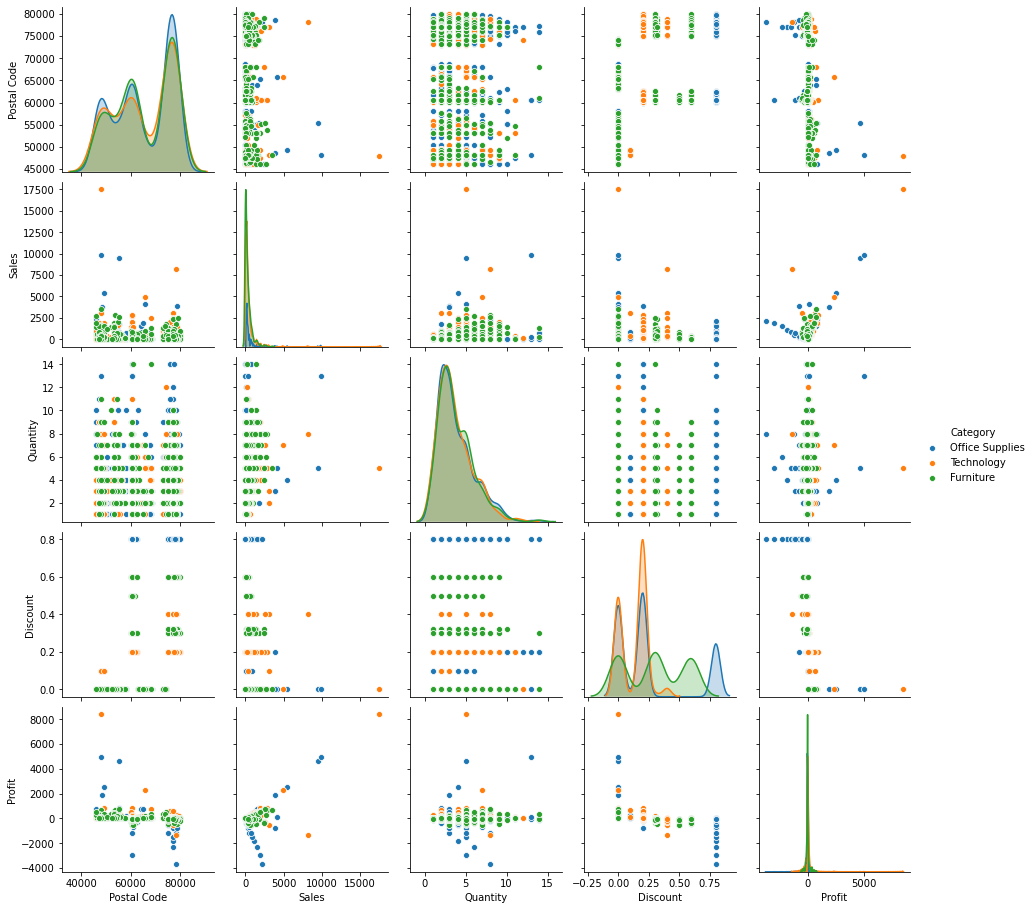

In [18]:
sns.pairplot(df_central, hue = 'Category')

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'Region', y = 'Discount', data = df_central, estimator = np.sum, hue = 'Category')

In [ ]:
g = sns.catplot(x = 'State', y = 'Profit', data = df_central, kind = 'bar', aspect = 3.0)
g.set_xticklabels(rotation = 45)

In [ ]:
sns.lmplot(x = 'Discount', y = 'Profit', data = df_central)

### South region
### Observations:
#### 1. Profit in Office supplies and Technology are same and higher than Furniture
#### 2. Florida, North Carolina and Tennessee are in loss
#### 3. As Discount is increased beyond 40%, profit is decreased
#### 4. Sales in Technology category is higher than other categories

In [ ]:
df_south = df[df['Region'] == 'South']

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'Region', y = 'Sales', data = df_south, estimator = np.sum, hue = 'Category')

In [ ]:
g = sns.catplot(x = 'State', y = 'Profit', data = df_south, kind = 'bar', aspect = 3.0)
g.set_xticklabels(rotation = 45)

In [ ]:
sns.pairplot(df_south, hue = 'Category')

In [ ]:
sns.lmplot(x = 'Discount', y = 'Profit', data = df_south)

In [ ]:
df_south.corr()                    # as discount is increasing, profit is decreasing

### West region
### Observation:
#### 1. Profit in Office supplies is very high so is the profit 
#### 2. Colorado, Arizona and Oregon have profits in negative because of the heavy discount
#### 3. As Discount is increased beyond 50%, profits tends to decrease

In [ ]:
df_west = df[df['Region'] == 'West']

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'Region', y = 'Profit', data = df_west, estimator = np.sum, hue = 'Category')

In [ ]:
sns.pairplot(df_west, hue = 'Category')

In [ ]:
g = sns.catplot(x = 'State', y = 'Discount', data = df_west, kind = 'bar', aspect = 3.0)
g.set_xticklabels(rotation = 45)

In [ ]:
df_west.groupby(['State','Category'])[['Profit']].sum()     

### East Region
### Observations:
#### 1. Profit in Furniture is significantly very low even though Sales are high
#### 2. Pennsylvania and Ohia are in loss because of their high discount
#### 3. Vermont has significantly high profit and as well as sales even though discount is almost zero

In [ ]:
df_east = df[df['Region'] == 'East']

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'Region', y = 'Profit', data = df_east, estimator = np.sum, hue = 'Category')

In [ ]:
g = sns.catplot(x = 'State', y = 'Sales', data = df_east, kind = 'bar', aspect = 3.0)
g.set_xticklabels(rotation = 45)

In [ ]:
df_east.corr()

In [ ]:
sns.pairplot(df_east, hue = 'Category')

### THE END !!!